In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Deposits

Fields:

*   ```id``` = transaction hash with appended to the end with transaction log index;
*   ```txHash``` = hash code of the transaction;
*   ```trader``` = hash code of the trader;
*   ```collateral_token``` = hash code of the token which is used by trader, in all cases there is only one token - USD coin;
*   ```amount``` = what value of USD was deposited to the system;
*   ```block_number_log_index``` = block number * 1000 + tx log index. Used for sorting transactions in the system;
*   ```block_number``` = number of the block where transaction was executed;
*   ```timestamp``` = time in seconds

In [3]:
deposits_df = pd.read_csv("deposits.csv")
deposits_df.drop(columns=["Unnamed: 0"], inplace=True)
deposits_df["time"] = pd.to_datetime(deposits_df["timestamp"], unit='s')
deposits_df

,id,tx_hash,trader,collateral_token,amount,block_number_log_index,block_number,timestamp,time
0,0xe3b75b08f5bc08eb7e2de960dffbe88df1c3e2de4bd2...,0xe3b75b08f5bc08eb7e2de960dffbe88df1c3e2de4bd2...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x7f5c764cbc14f9669b88837ca1490cca17c31607,250000.000000,515551002,515551,1638000985,2021-11-27 08:16:25
1,0x7c0d88b53e0f416e9643d4c1d287df62337dc17b935d...,0x7c0d88b53e0f416e9643d4c1d287df62337dc17b935d...,0x98029c23e4a554989c280de7fcb1c2ededf2b17f,0x7f5c764cbc14f9669b88837ca1490cca17c31607,500.000000,516284002,516284,1638002723,2021-11-27 08:45:23
2,0xe17370b8c373f24c02df5effe94220e12c85cbfa6815...,0xe17370b8c373f24c02df5effe94220e12c85cbfa6815...,0x1313817a82545e29764281f51f6255619753235d,0x7f5c764cbc14f9669b88837ca1490cca17c31607,500.000000,516348002,516348,1638003246,2021-11-27 08:54:06
3,0x76d948abee1a1de89b947876dec3941d7a7d7e3860d5...,0x76d948abee1a1de89b947876dec3941d7a7d7e3860d5...,0xd087966b4d2b1841c88b4d62b407d5ef1a465ac3,0x7f5c764cbc14f9669b88837ca1490cca17c31607,500.000000,516415002,516415,1638003538,2021-11-27 08:58:58
4,0x02288555584fe8d00e6e4c596d286544647666a01eed...,0x02288555584fe8d00e6e4c596d286544647666a01eed...,0xc9735c7e0015fc9719f28306f90e530420f9b4ef,0x7f5c764cbc14f9669b88837ca1490cca17c31607,500.000000,516446002,516446,1638003768,2021-11-27 09:02:48
...,...,...,...,...,...,...,...,...,...
21016,0xcd72a3fe1192f075248bc0b7b1fd6ceaad5ede14c72b...,0xcd72a3fe1192f075248bc0b7b1fd6ceaad5ede14c72b...,0xdc727e98cb97550b04b9b370b7286f98fd6ce832,0x7f5c764cbc14f9669b88837ca1490cca17c31607,20000.000000,6646514002,6646514,1651132541,2022-04-28 07:55:41
21017,0x4ad7077af869eda9458544bfcdbd456191e5ffdcca97...,0x4ad7077af869eda9458544bfcdbd456191e5ffdcca97...,0x0df2a3b9e5b8ac060b73654c0b7d77ad7dae572f,0x7f5c764cbc14f9669b88837ca1490cca17c31607,2.000000,6646785002,6646785,1651132867,2022-04-28 08:01:07
21018,0x5bf8f49846db7e917619a95f8804c4a48b1e0761f68e...,0x5bf8f49846db7e917619a95f8804c4a48b1e0761f68e...,0xbd96a914e932aff88a8529fb86d49314c6fafcea,0x7f5c764cbc14f9669b88837ca1490cca17c31607,14631.276264,6652910002,6652910,1651140296,2022-04-28 10:04:56
21019,0x60c2c44ade6c07a1845b4103e110dbd2a1082f074164...,0x60c2c44ade6c07a1845b4103e110dbd2a1082f074164...,0xbb20d477d4f22d7169ad4c5bd67984362be8bad0,0x7f5c764cbc14f9669b88837ca1490cca17c31607,146.497910,6653693002,6653693,1651141101,2022-04-28 10:18:21


In [4]:
deposits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21021 entries, 0 to 21020
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      21021 non-null  object        
 1   tx_hash                 21021 non-null  object        
 2   trader                  21021 non-null  object        
 3   collateral_token        21021 non-null  object        
 4   amount                  21021 non-null  float64       
 5   block_number_log_index  21021 non-null  int64         
 6   block_number            21021 non-null  int64         
 7   timestamp               21021 non-null  int64         
 8   time                    21021 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 1.4+ MB


There is only one collateral token - USD coin. Therefore, this column is reduntant.

In [5]:
deposits_df["collateral_token"].unique()

array(['0x7f5c764cbc14f9669b88837ca1490cca17c31607'], dtype=object)

In [6]:
len(deposits_df["trader"].unique())

11977

In [7]:
print("there are " + str(len(deposits_df["trader"].unique())) + " unique traders")
print("overall collected deposits are " + str(deposits_df["amount"].sum()) + " in USD")

there are 11977 unique traders
overall collected deposits are 83591322.704569 in USD


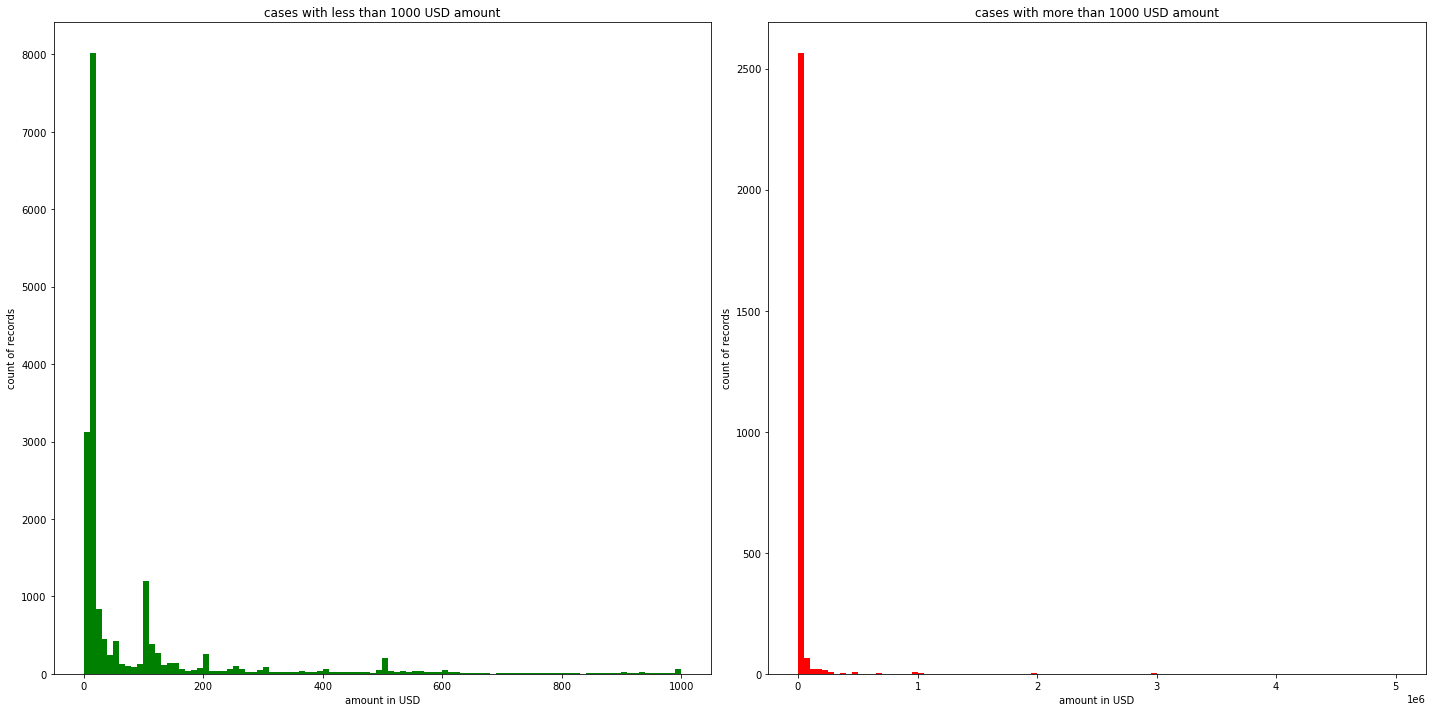

In [8]:
fig = plt.figure(figsize=(20, 10))

ax = fig.add_subplot(1, 2, 1)
ax.hist(deposits_df[deposits_df["amount"] < 1000]["amount"], color="g", bins=100)
ax.set_xlabel("amount in USD")
ax.set_ylabel("count of records")
ax.set_title("cases with less than 1000 USD amount")

ax = fig.add_subplot(1, 2, 2)
ax.hist(deposits_df[deposits_df["amount"] >= 1000]["amount"], color="r", bins=100)
ax.set_xlabel("amount in USD")
ax.set_ylabel("count of records")
ax.set_title("cases with more than 1000 USD amount")

fig.tight_layout()
plt.show()

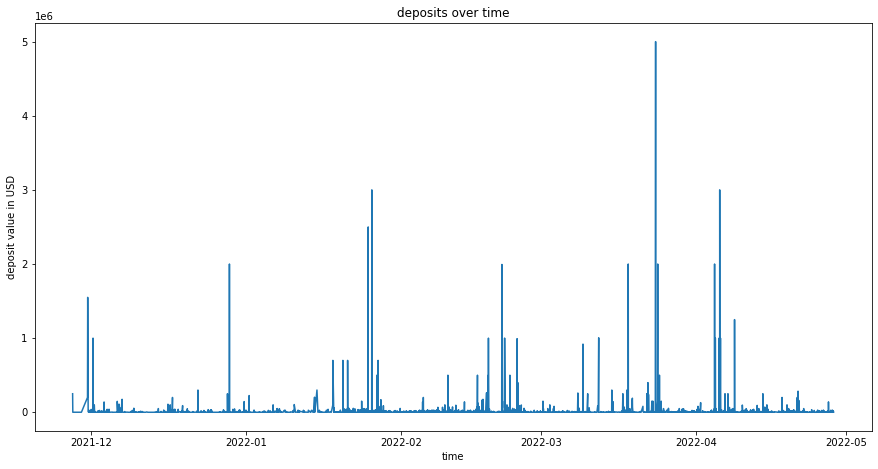

In [10]:
fig, ax = plt.subplots(figsize=(15, 7.5))
ax.plot(deposits_df["time"], deposits_df["amount"])
ax.set_xlabel("time")
ax.set_ylabel("deposit value in USD")
ax.set_title("deposits over time")
plt.show()

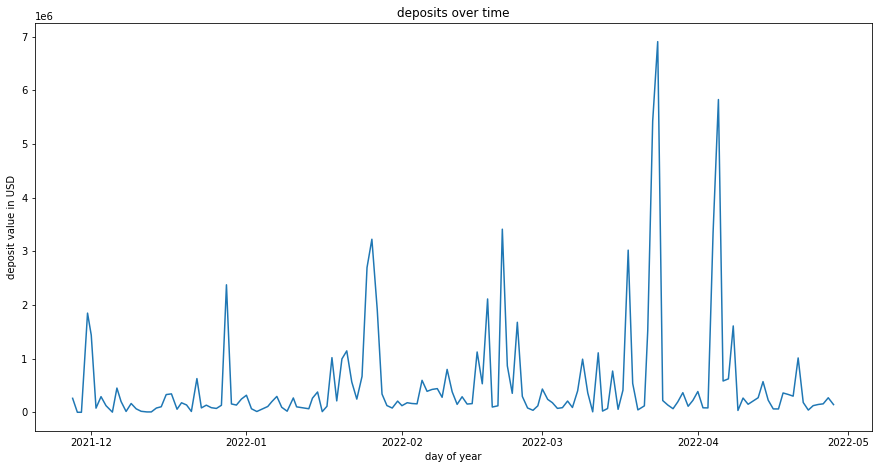

In [15]:
deposits_df["day_of_year"] = deposits_df["time"].dt.dayofyear
grouped_deposits_df = deposits_df[["day_of_year", "amount"]].groupby(by=["day_of_year"]).sum()
time_deposits_df = deposits_df[["day_of_year", "time"]].groupby(by="day_of_year").min()
grouped_deposits_df["time"] = time_deposits_df["time"]
grouped_deposits_df.sort_values(by=["time"], inplace=True)

fig, ax = plt.subplots(figsize=(15, 7.5))
ax.plot(grouped_deposits_df["time"], grouped_deposits_df["amount"])
ax.set_xlabel("day of year")
ax.set_ylabel("deposit value in USD")
ax.set_title("deposits over time")
plt.show()

# Funding payments

Fields:

*   ```id``` = transaction hash with appended to the end with transaction log index;
*   ```txHash``` = hash code of the transaction;
*   ```trader``` = hash code of the trader;
*   ```base_token``` = hash code of the token, pool of which will receive the funding payment;
*   ```funding_payment``` = value of funding payment (**in respective token or USD?**)
*   ```block_number_log_index``` = block number * 1000 + tx log index. Used for sorting transactions in the system;
*   ```block_number``` = number of the block where transaction was executed;
*   ```timestamp``` = time in seconds

In [9]:
funding_payments_df = pd.read_csv("funding_payments.csv")
funding_payments_df.drop(columns=["Unnamed: 0"], inplace=True)
funding_payments_df

,id,tx_hash,base_token,funding_payment,block_number_log_index,block_number,timestamp,time
0,0x9a9ef69c82d19bde6a2794c5de22bbb02dd3b2b4f048...,0x9a9ef69c82d19bde6a2794c5de22bbb02dd3b2b4f048...,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,0.000000,515560002,515560,1638001140,2021-11-27 08:19:00
1,0x9e2a266e4bb63ea7baaa53522ed51d7dc414df095e07...,0x9e2a266e4bb63ea7baaa53522ed51d7dc414df095e07...,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,0.000000,515624002,515624,1638001245,2021-11-27 08:20:45
2,0x79655d30e251fa6cd88d1bdeb0a3bc11d2316b6dd5ff...,0x79655d30e251fa6cd88d1bdeb0a3bc11d2316b6dd5ff...,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,0.000000,515740002,515740,1638001497,2021-11-27 08:24:57
3,0x6cf3b7acabc36423f5c80006028ef5144c006fecfb36...,0x6cf3b7acabc36423f5c80006028ef5144c006fecfb36...,0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb,0.000000,516486001,516486,1638003992,2021-11-27 09:06:32
4,0x1f9cbc33e7ba0bb63fe8431c7356c19e2a8529a8277b...,0x1f9cbc33e7ba0bb63fe8431c7356c19e2a8529a8277b...,0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb,0.021516,516538002,516538,1638004141,2021-11-27 09:09:01
...,...,...,...,...,...,...,...,...
1256298,0xd80963da3dab9b40e88974d6503be211716cb9f104f1...,0xd80963da3dab9b40e88974d6503be211716cb9f104f1...,0x5f714b5347f0b5de9f9598e39840e176ce889b9c,-0.052126,6654489002,6654489,1651142421,2022-04-28 10:40:21
1256299,0x16fbcaff78222cb4dfdec16d32259b0162ca84f95708...,0x16fbcaff78222cb4dfdec16d32259b0162ca84f95708...,0x5faa136fc58b6136ffdaeaac320076c4865c070f,-0.413521,6654496002,6654496,1651142436,2022-04-28 10:40:36
1256300,0x30bd553aa066834bd88dc00b30dd5030c2848ab3a171...,0x30bd553aa066834bd88dc00b30dd5030c2848ab3a171...,0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb,-0.001881,6654502001,6654502,1651142436,2022-04-28 10:40:36
1256301,0xd47554ffcb9659e9f40b68e8c2aa0589724b4b659808...,0xd47554ffcb9659e9f40b68e8c2aa0589724b4b659808...,0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb,-0.009709,6654501002,6654501,1651142436,2022-04-28 10:40:36


In [10]:
funding_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256303 entries, 0 to 1256302
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   id                      1256303 non-null  object 
 1   tx_hash                 1256303 non-null  object 
 2   base_token              1256303 non-null  object 
 3   funding_payment         1256303 non-null  float64
 4   block_number_log_index  1256303 non-null  int64  
 5   block_number            1256303 non-null  int64  
 6   timestamp               1256303 non-null  int64  
 7   time                    1256303 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 76.7+ MB


In [11]:
print("there are " + str(len(funding_payments_df["base_token"].unique())) + " unique base tokens")
print("total collected funding payments = " + str(funding_payments_df["funding_payment"].sum()) + " USD")
print("total positive funding payments = " + str(funding_payments_df[funding_payments_df["funding_payment"] > 0]["funding_payment"].sum()) + " USD")
print("total negative funding payments = " + str(funding_payments_df[funding_payments_df["funding_payment"] < 0]["funding_payment"].sum()) + " USD")

there are 18 unique base tokens
total collected funding payments = -115555.62096951042 USD
total positive funding payments = 573247.4578850945 USD
total negative funding payments = -688803.0788546051 USD


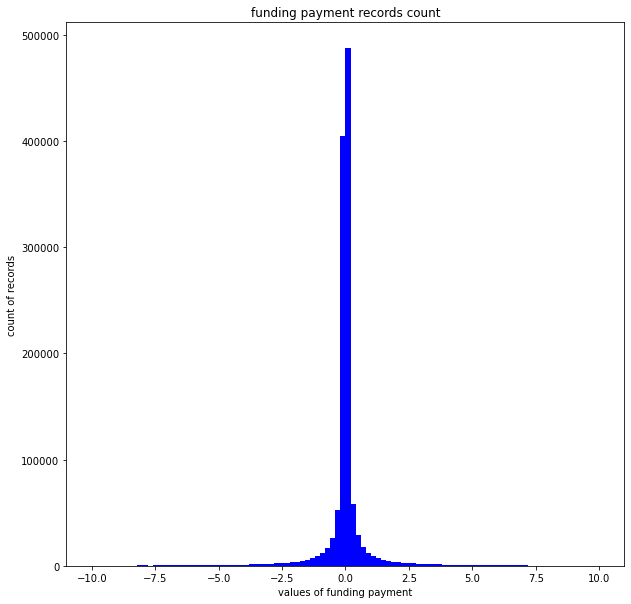

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.hist(funding_payments_df[(funding_payments_df["funding_payment"] < 10) &
                            (funding_payments_df["funding_payment"] > -10)]["funding_payment"], color='b', bins=100)
ax.set_xlabel("values of funding payment")
ax.set_ylabel("count of records")
ax.set_title("funding payment records count")
plt.show()

# Liquidity changes

Fields:

*   ```id``` = transaction hash with appended to the end with transaction log index;
*   ```txHash``` = hash code of the transaction;
*   ```maker``` = hash code of the trader/maker;
*   ```base_token``` = hash code of the token, in pool of which liquidity change was registered;
*   ```quote_token``` = hash code of the second token in pool (all cases contain USD coin);
*   ```lower_tick``` = **unknown**;
*   ```upper_tick``` = **unknown**;
*   ```base``` = amount of base token added to the liquidity, exclude fee ("+" - means added liquidity; "-" - means removed liquidity);
*   ```quote``` = amount of quote token added to the liquidity, exclude fee ("+" - means added liquidity; "-" - means removed liquidity);
*   ```liquidity``` = amount of liquidity unit added ("+" - means added liquidity; "-" - means removed liquidity);
*   ```quoteFee``` = amount of quote token the maker received as fee;
*   ```from_function_signature``` = signature of the applied function;
*   ```block_number_log_index``` = block number * 1000 + tx log index. Used for sorting transactions in the system;
*   ```block_number``` = number of the block where transaction was executed;
*   ```timestamp``` = time in seconds

In [13]:
liquidity_changes_df = pd.read_csv("liquidity_changes.csv")
liquidity_changes_df.drop(columns=["Unnamed: 0"], inplace=True)
liquidity_changes_df["time"] = pd.to_datetime(liquidity_changes_df["timestamp"], unit='s')
liquidity_changes_df

,id,tx_hash,maker,base_token,quote_token,lower_tick,upper_tick,base,quote,liquidity,quote_fee,from_function_signature,block_number_log_index,block_number,timestamp,time
0,0x7871b4fe6113ac31c8be911146b109575cfb9ee90b13...,0x7871b4fe6113ac31c8be911146b109575cfb9ee90b13...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb,0xc84da6c8ec7a57cd10b939e79eaf9d2d17834e04,82680,83700,46.254982,200000.000000,120851329740116430743586,0.000000,0xc35eb28c,515557003,515557,1638000985,2021-11-27 08:16:25
1,0x7dba9c535f6c595ab39eeec818d89b34783442bafa81...,0x7dba9c535f6c595ab39eeec818d89b34783442bafa81...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb,0xc84da6c8ec7a57cd10b939e79eaf9d2d17834e04,-887220,887220,0.012181,50.000000,780406707692264026,0.000000,0xc35eb28c,515554004,515554,1638000985,2021-11-27 08:16:25
2,0xc438a7cd8fee202ce2b53761811ef05f85095933b27e...,0xc438a7cd8fee202ce2b53761811ef05f85095933b27e...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,0xc84da6c8ec7a57cd10b939e79eaf9d2d17834e04,108540,109500,3.572179,200000.000000,35648835496586206981164,0.000000,0xc35eb28c,515555003,515555,1638000985,2021-11-27 08:16:25
3,0xec1e410b931f920c4aa3ae105e63463142b310fbe959...,0xec1e410b931f920c4aa3ae105e63463142b310fbe959...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,0xc84da6c8ec7a57cd10b939e79eaf9d2d17834e04,-887220,887220,0.000921,50.000000,214579018294735723,0.000000,0xc35eb28c,515552004,515552,1638000985,2021-11-27 08:16:25
4,0x653f9413a9c8df27d2800bbb71f06fd20b6d825b3d38...,0x653f9413a9c8df27d2800bbb71f06fd20b6d825b3d38...,0x35952141922ee99a04e016c967c3f0ad589ea958,0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb,0xc84da6c8ec7a57cd10b939e79eaf9d2d17834e04,82920,83640,0.100000,472.798469,386315245282791945890,0.000000,0xc35eb28c,516478004,516478,1638003992,2021-11-27 09:06:32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95645,0x3c94355621ea01688d374d07da032f57f3ec04480187...,0x3c94355621ea01688d374d07da032f57f3ec04480187...,0x94934851b2c6a066f9e5acb353bce4bc7fcdcdbd,0x151bb01c79f4516c233948d69dae39869bccb737,0xc84da6c8ec7a57cd10b939e79eaf9d2d17834e04,45120,47040,-2470.572327,-248190.110460,-528387530374088819323470,0.000000,0xcde109b6,6654324008,6654324,1651142059,2022-04-28 10:34:19
95646,0x19a82695df86a912368aac959536f93262c39cfe02f6...,0x19a82695df86a912368aac959536f93262c39cfe02f6...,0xe77dd81813bd06d74a30d1b2c07418906456498e,0x333b1ea429a88d0dd48ce7c06c16609cd76f43a8,0xc84da6c8ec7a57cd10b939e79eaf9d2d17834e04,8460,10380,-204626.160511,-454278.053108,-6522007735030680945024298,58.114949,0xcde109b6,6654380006,6654380,1651142170,2022-04-28 10:36:10
95647,0xda223d45899d4d3e9e39a193dbbda700edde88110101...,0xda223d45899d4d3e9e39a193dbbda700edde88110101...,0xe77dd81813bd06d74a30d1b2c07418906456498e,0x333b1ea429a88d0dd48ce7c06c16609cd76f43a8,0xc84da6c8ec7a57cd10b939e79eaf9d2d17834e04,8400,10320,49063.646978,123088.079928,1658298770984291147556810,0.000000,0xc35eb28c,6654370006,6654370,1651142170,2022-04-28 10:36:10
95648,0x716065511888b305590bf64cb26fba2f2270d26453c8...,0x716065511888b305590bf64cb26fba2f2270d26453c8...,0x70332de459d5554a9a310a7c4f7c6069c73604f9,0x2db8d2db86ca3a4c7040e778244451776570359b,0xc84da6c8ec7a57cd10b939e79eaf9d2d17834e04,-960,960,487306.142879,500000.000000,10533713373586645166672268,0.000000,0xc35eb28c,6654565006,6654565,1651142607,2022-04-28 10:43:27


In [14]:
liquidity_changes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95650 entries, 0 to 95649
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       95650 non-null  object        
 1   tx_hash                  95650 non-null  object        
 2   maker                    95650 non-null  object        
 3   base_token               95650 non-null  object        
 4   quote_token              95650 non-null  object        
 5   lower_tick               95650 non-null  int64         
 6   upper_tick               95650 non-null  int64         
 7   base                     95650 non-null  float64       
 8   quote                    95650 non-null  float64       
 9   liquidity                95650 non-null  object        
 10  quote_fee                95650 non-null  float64       
 11  from_function_signature  95650 non-null  object        
 12  block_number_log_index   95650 n

In [15]:
print("there are " + str(len(liquidity_changes_df["maker"].unique())) + " unique makers registered")
print("there are " + str(len(liquidity_changes_df["quote_token"].unique())) + " unique quote tokens found")
print("there are " + str(len(liquidity_changes_df["from_function_signature"].unique())) + " unique function signatures")
print("sum of the quote token liquidity changes = " + str(liquidity_changes_df["quote"].sum()) + " USD")
print("sum of the collected quote fees = " + str(liquidity_changes_df["quote_fee"].sum()) + " USD")

there are 810 unique makers registered
there are 1 unique quote tokens found
there are 4 unique function signatures
sum of the quote token liquidity changes = 79616289.38137859 USD
sum of the collected quote fees = 6549553.546286192 USD


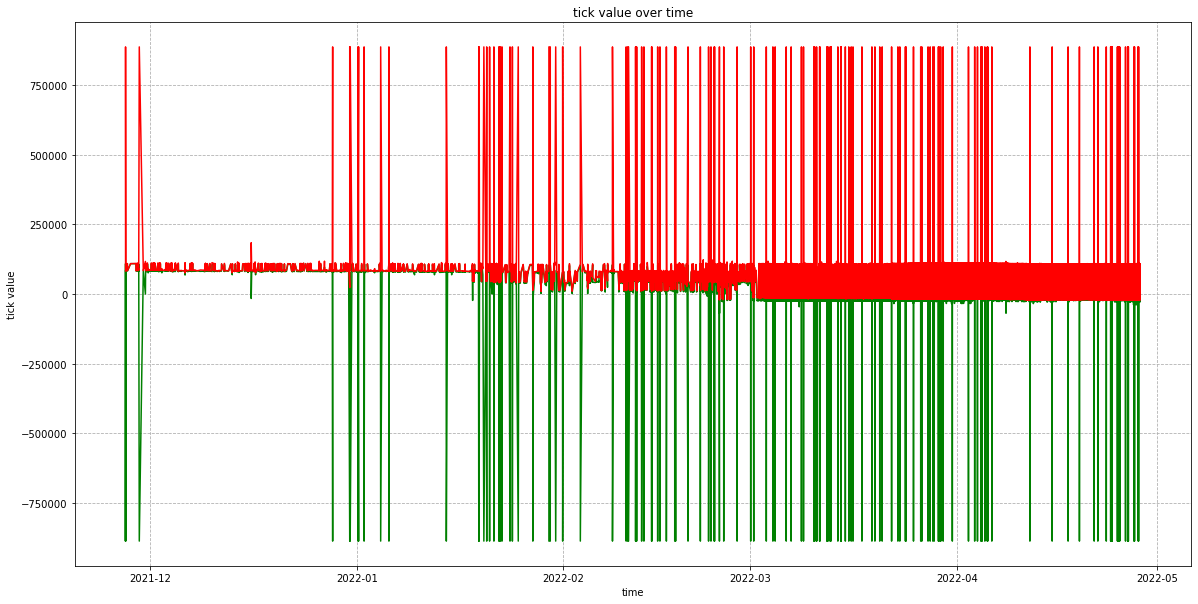

In [16]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(liquidity_changes_df["time"], liquidity_changes_df["lower_tick"], color='g', label='lower tick')
ax.plot(liquidity_changes_df["time"], liquidity_changes_df["upper_tick"], color='r', label="upper tick")
ax.set_xlabel("time")
ax.set_ylabel("tick value")
ax.set_title("tick value over time")
ax.grid(True, linestyle='--')
plt.show()

In [17]:
liquidity_changes_df["base_token"].unique()

array(['0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb',
       '0x86f1e0420c26a858fc203a3645dd1a36868f18e5',
       '0x5faa136fc58b6136ffdaeaac320076c4865c070f',
       '0xb24f50dd9918934ab2228be7a097411ca28f6c14',
       '0x151bb01c79f4516c233948d69dae39869bccb737',
       '0x7161c3416e08abaa5cd38e68d9a28e43a694e037',
       '0x333b1ea429a88d0dd48ce7c06c16609cd76f43a8',
       '0x2f198182ec54469195a4a06262a9431a42462373',
       '0x5f714b5347f0b5de9f9598e39840e176ce889b9c',
       '0x77d0cc9568605bfff32f918c8ffaa53f72901416',
       '0x3fb3282e3ba34a0bff94845f1800eb93cc6850d4',
       '0x2db8d2db86ca3a4c7040e778244451776570359b',
       '0x7eada83e15acd08d22ad85a1dce92e5a257acb92',
       '0xb6599bd362120dc70d48409b8a08888807050700',
       '0x9482aafdced6b899626f465e1fa0cf1b1418d797',
       '0xbe5de48197fc974600929196239e264ecb703ee8',
       '0x34235c8489b06482a99bb7fcab6d7c467b92d248',
       '0x9d34f1d15c22e4c0924804e2a38cbe93dfb84bc2'], dtype=object)

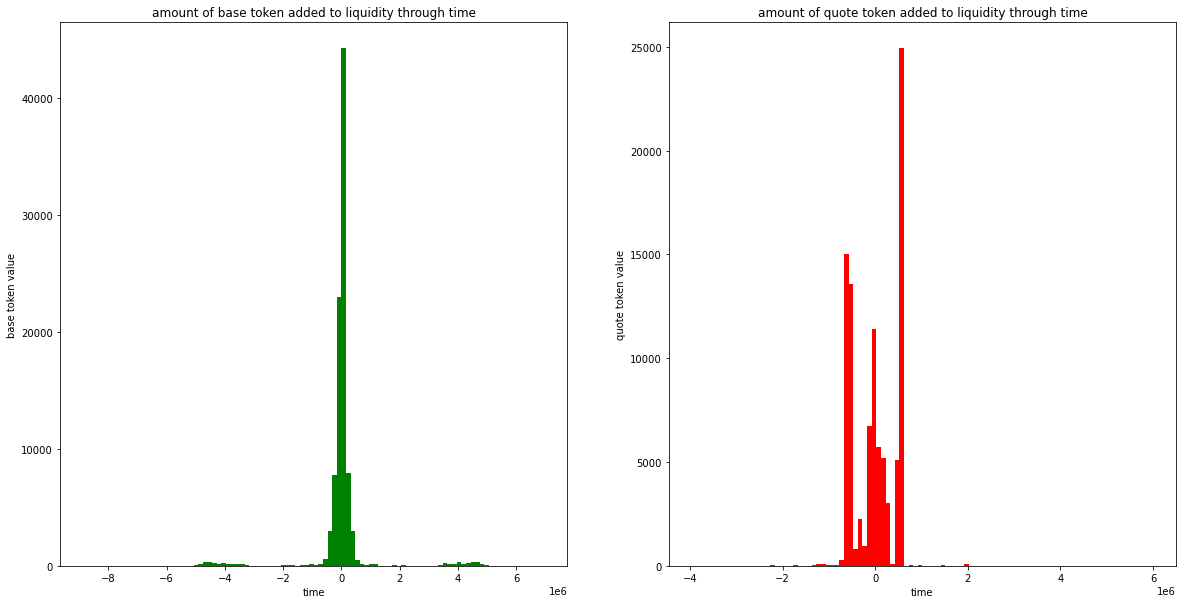

In [18]:
fig = plt.figure(figsize=(20, 10))

ax = fig.add_subplot(1, 2, 1)
ax.hist(liquidity_changes_df["base"], color="g", bins=100)
ax.set_xlabel("time")
ax.set_ylabel("base token value")
ax.set_title("amount of base token added to liquidity through time")

ax = fig.add_subplot(1, 2, 2)
ax.hist(liquidity_changes_df["quote"], color="r", bins=100)
ax.set_xlabel("time")
ax.set_ylabel("quote token value")
ax.set_title("amount of quote token added to liquidity through time")

plt.show()

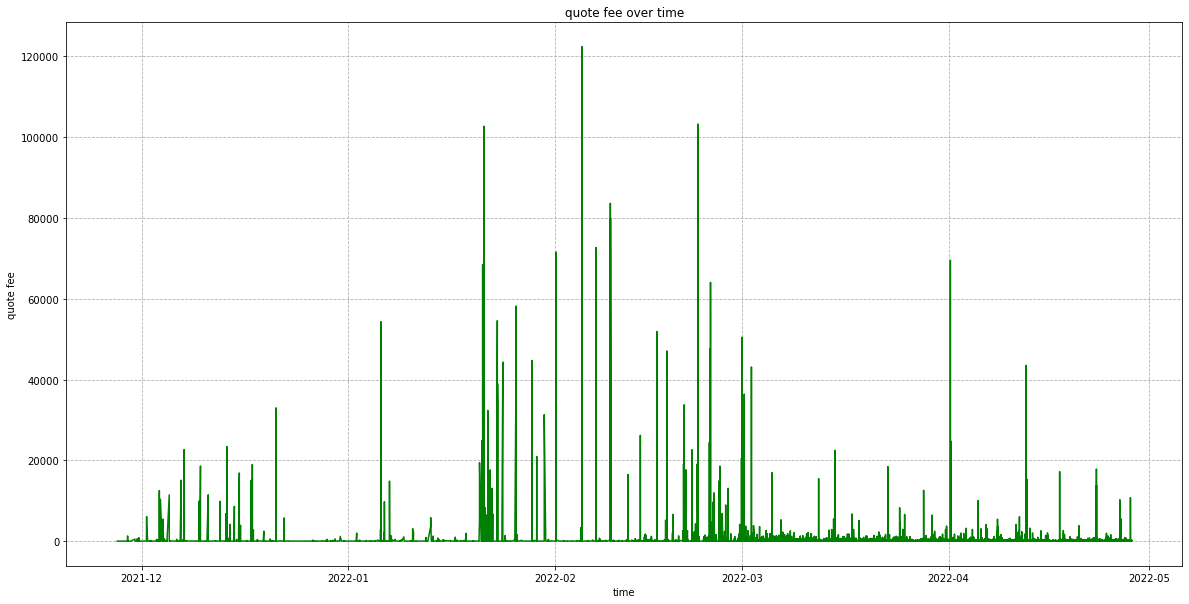

In [19]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(liquidity_changes_df["time"], liquidity_changes_df["quote_fee"], color='g')
ax.set_xlabel("time")
ax.set_ylabel("quote fee")
ax.set_title("quote fee over time")
ax.grid(True, linestyle='--')
plt.show()

# Position Changes

Fields:

*   ```id``` = transaction hash with appended to the end with transaction log index;
*   ```txHash``` = hash code of the transaction;
*   ```trader``` = hash code of the trader;
*   ```base_token``` = hash code of the token, in the pool of which changes are registered;
*   ```exchanged_position_size``` = with how many base tokens position has changed ("+" - shift to long position; "-" - shift to short position);
*   ```exchanged_position_notional``` = **registered changes in USD?**;
*   ```fee``` - trading fee (most likely in USD);
*   ```open_notional``` = average open notional after current transaction;
*   ```realized_pnl``` = realized profits and losses by this transaction;
*   ```position_size_after``` = size of the position (most likely, USD)
*   ```swapped_price``` = swapped price of this transaction - abs(position.openNotional / position.positionSize);
*   ```entry_price_after``` = average entry price after this transaction - abs(position.openNotional / position.positionSize)
*   ```market_price_after``` = market price after this transaction;
*   ```from_function_signature``` = signature of the applied function;
*   ```block_number_log_index``` = block number * 1000 + tx log index. Used for sorting transactions in the system;
*   ```block_number``` = number of the block where transaction was executed;
*   ```timestamp``` = time in seconds

In [20]:
position_changes_df = pd.read_csv("position_changes.csv")
position_changes_df.drop(columns=["Unnamed: 0"], inplace=True)
position_changes_df["time"] = pd.to_datetime(position_changes_df["timestamp"], unit="s")
position_changes_df

,id,tx_hash,trader,base_token,exchanged_position_size,exchanged_position_notional,fee,open_notional,realized_pnl,position_size_after,swapped_price,entry_price_after,market_price_after,from_function_signature,block_number_log_index,block_number,timestamp,time
0,0x0bc364e9f5a99c87cfb5c1f4a6ef2b9784e872092805...,0x0bc364e9f5a99c87cfb5c1f4a6ef2b9784e872092805...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,0.055019,-2997.000000,3.000000,-15000.000000,0.000000,0.275492,54472.154115,54448.103193,54491.778871,0xb6b1b6c3,515608004,515608,1638001140,2021-11-27 08:19:00
1,0x0ccfa4751250a5374b5d28823a1011987b833f71a1ce...,0x0ccfa4751250a5374b5d28823a1011987b833f71a1ce...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,0.055098,-2997.000000,3.000000,-9000.000000,0.000000,0.165414,54393.697496,54408.885139,54413.308117,0xb6b1b6c3,515587004,515587,1638001140,2021-11-27 08:19:00
2,0x0e085ae4b7c345ee6de6d67f16c8c127a694d1c9f27f...,0x0e085ae4b7c345ee6de6d67f16c8c127a694d1c9f27f...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb,0.729828,-2997.000000,3.000000,-3000.000000,0.000000,0.729828,4106.445744,4110.556300,4108.035203,0xb6b1b6c3,515571005,515571,1638001140,2021-11-27 08:19:00
3,0x47357bec5ee7101b57f457be5135c91a9c7133cc82bb...,0x47357bec5ee7101b57f457be5135c91a9c7133cc82bb...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb,0.728137,-2997.000000,3.000000,-12000.000000,0.000000,2.915928,4115.986193,4115.327606,4117.577498,0xb6b1b6c3,515594004,515594,1638001140,2021-11-27 08:19:00
4,0x548dd8a96b9faa92066283339832e380fd506f4ebc94...,0x548dd8a96b9faa92066283339832e380fd506f4ebc94...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb,0.729264,-2997.000000,3.000000,-6000.000000,0.000000,1.459092,4109.624663,4112.146735,4111.214738,0xb6b1b6c3,515584004,515584,1638001140,2021-11-27 08:19:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834858,0xd91c7e2a87ab9380062386239788915e4f1c5a052fc8...,0xd91c7e2a87ab9380062386239788915e4f1c5a052fc8...,0xbca93564bbf750e7b81ee1506009c7d86c6a4a45,0xb24f50dd9918934ab2228be7a097411ca28f6c14,-32.999902,3023.793838,3.023794,-14962.556823,-9.172361,162.961152,91.630389,91.816710,91.582076,0xb6b1b6c3,6651587008,6651587,1651138134,2022-04-28 09:28:54
1834859,0x1ec3f79f957587b332572447f288b15ad1196a7e760a...,0x1ec3f79f957587b332572447f288b15ad1196a7e760a...,0x6f2ddd6d04aa4ebaa6e9529e8a1b4062a2716281,0x9d34f1d15c22e4c0924804e2a38cbe93dfb84bc2,128.952896,-2594.732513,2.597330,8420.360981,-0.556983,-418.145904,20.121553,20.137375,20.132960,0xb6b1b6c3,6651597008,6651597,1651138149,2022-04-28 09:29:09
1834860,0x5d9e91d0e0f32cfd68a39c001e3c1a3a77f7d629b48c...,0x5d9e91d0e0f32cfd68a39c001e3c1a3a77f7d629b48c...,0x4b4f526b450c75f3cb0e9aa0a0b5480e4b0c478a,0x151bb01c79f4516c233948d69dae39869bccb737,-25.872016,2596.910612,2.596911,7150.315804,0.000000,-71.290018,100.375270,100.298977,100.362358,0xb6b1b6c3,6651599007,6651599,1651138149,2022-04-28 09:29:09
1834861,0x978645e43b1779dae628ed4df8a0350803d161c8fef1...,0x978645e43b1779dae628ed4df8a0350803d161c8fef1...,0xd8bcd1e2f0e96a3402fd678b0b2eaceb80e1c226,0xbe5de48197fc974600929196239e264ecb703ee8,3371.136364,-4297.643387,0.000000,85634.249350,-31.434297,-67667.741060,1.274835,1.265511,1.273833,0xcde109b6,6651595007,6651595,1651138149,2022-04-28 09:29:09


In [21]:
position_changes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1834863 entries, 0 to 1834862
Data columns (total 18 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   id                           object        
 1   tx_hash                      object        
 2   trader                       object        
 3   base_token                   object        
 4   exchanged_position_size      float64       
 5   exchanged_position_notional  float64       
 6   fee                          float64       
 7   open_notional                float64       
 8   realized_pnl                 float64       
 9   position_size_after          float64       
 10  swapped_price                float64       
 11  entry_price_after            float64       
 12  market_price_after           float64       
 13  from_function_signature      object        
 14  block_number_log_index       int64         
 15  block_number                 int64         
 16  

In [22]:
print("there are " + str(len(position_changes_df["trader"].unique())) + " unique traders")
print("there are " + str(len(position_changes_df["base_token"].unique())) + " unique base tokens")
print("there are " + str(len(position_changes_df["from_function_signature"].unique())) + " unique function signatures")
print("there are " + str(len(position_changes_df[position_changes_df["position_size_after"] > 0])) + " records with long positions")
print("there are " + str(len(position_changes_df[position_changes_df["position_size_after"] < 0])) + " records with short positions")
print("there are " + str(len(position_changes_df[position_changes_df["position_size_after"] == 0])) + " records with closed positions")
print("=====================================================================================================")
print("final state of realized pnl = " + str(position_changes_df["realized_pnl"].sum()) + " USD")
print("final state of fees = " + str(position_changes_df["fee"].sum()) + " USD")

there are 11443 unique traders
there are 18 unique base tokens
there are 25 unique function signatures
there are 577046 records with long positions
there are 1140369 records with short positions
there are 117448 records with closed positions
final state of realized pnl = -6701636.006961406 USD
final state of fees = 7769810.491511692 USD


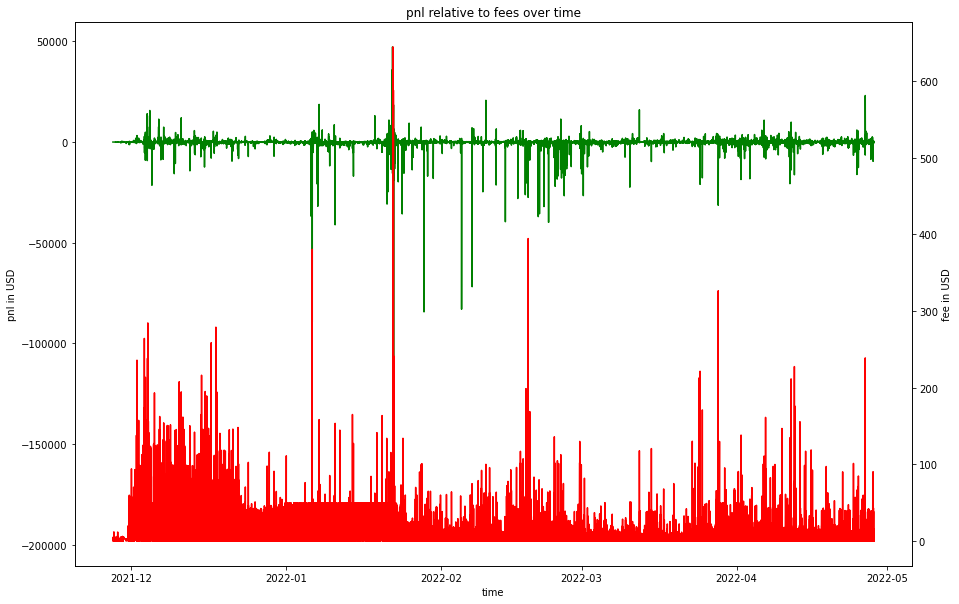

In [23]:
fig, ax = plt.subplots(figsize=(15, 10))
ax2 = ax.twinx()

ax.plot(position_changes_df["time"], position_changes_df["realized_pnl"], color='g', label="realized profit'n'loss")
ax.set_xlabel("time")
ax.set_ylabel("pnl in USD")

ax2.plot(position_changes_df["time"], position_changes_df["fee"], color='r', label="fee")
ax2.set_ylabel("fee in USD")
ax2.set_title("pnl relative to fees over time")

plt.show()

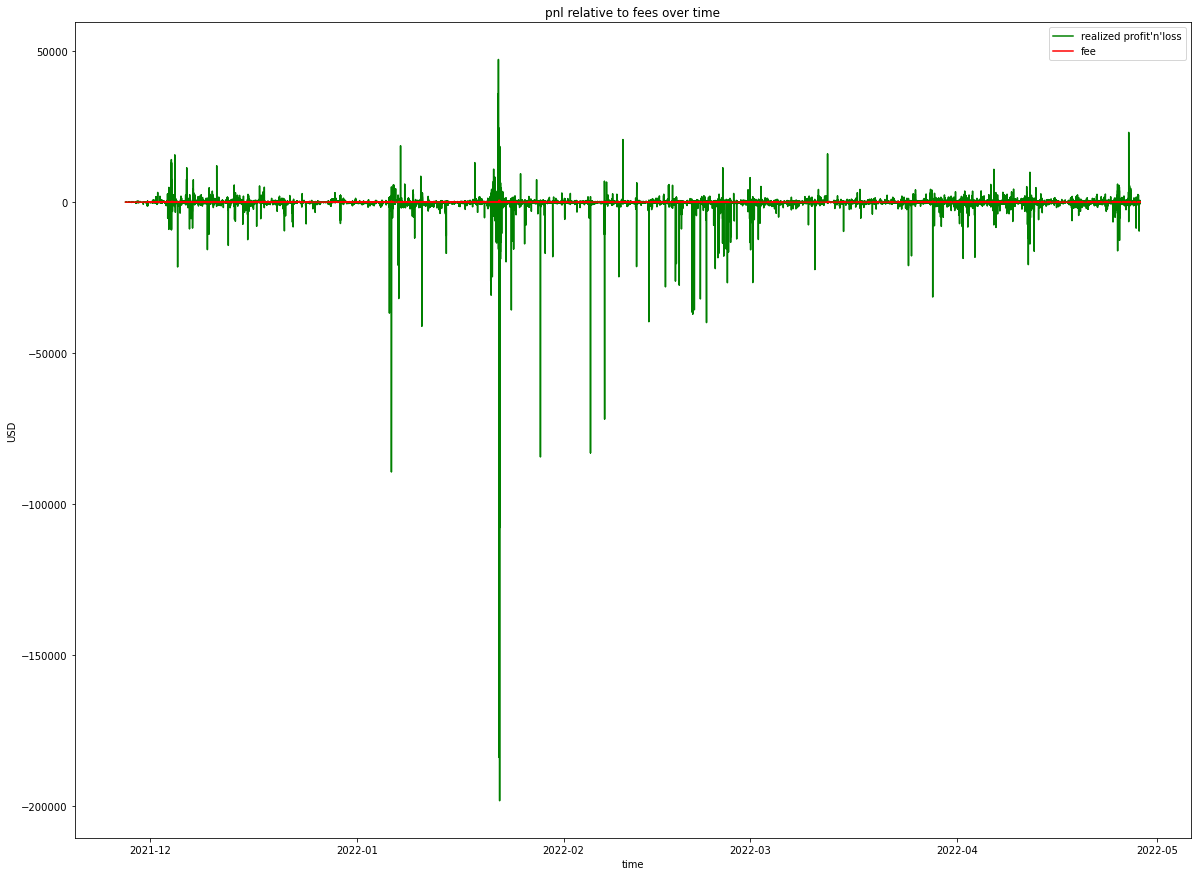

In [24]:
fig, ax = plt.subplots(figsize=(20, 15))

ax.plot(position_changes_df["time"], position_changes_df["realized_pnl"], color='g', label="realized profit'n'loss")
ax.plot(position_changes_df["time"], position_changes_df["fee"], color='r', label="fee")
ax.set_xlabel("time")
ax.set_ylabel("USD")
ax.legend()
ax.set_title("pnl relative to fees over time")

plt.show()

# Position Histories

Fields:

*   ```id``` = transaction hash with appended to the end with transaction log index;
*   ```trader``` = hash code of the trader;
*   ```base_token``` = hash code of the token, in the pool of which changes are registered;
*   ```position_size``` = size of the position ("+" - shift to long position; "-" - shift to short position);
*   ```entry_price``` - price of the token;
*   ```open_notional``` = average open notional after current transaction;
*   ```realized_pnl``` = realized profits and losses by this transaction;
*   ```funding_payment``` = received funding payment;
*   ```trading_fee``` = fee for the operation;
*   ```liquidation_fee``` = fee for the liquidation of the position;
*   ```block_number``` = number of the block where transaction was executed;
*   ```timestamp``` = time in seconds

In [25]:
position_histories_df = pd.read_csv("position_histories.csv")
position_histories_df.drop(columns=["Unnamed: 0"], inplace=True)
position_histories_df

,id,trader,base_token,position_size,open_notional,entry_price,realized_pnl,funding_payment,trading_fee,liquidation_fee,block_number,timestamp,time
0,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7-0x8...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,0.275492,-15000.000000,54448.103193,0.000000,0.000000,15.000000,0.0,515608,1638001140,2021-11-27 08:19:00
1,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7-0x8...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,0.165414,-9000.000000,54408.885139,0.000000,0.000000,9.000000,0.0,515587,1638001140,2021-11-27 08:19:00
2,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7-0x8...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,0.110316,-6000.000000,54389.276112,0.000000,0.000000,6.000000,0.0,515582,1638001140,2021-11-27 08:19:00
3,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7-0x8...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,0.055178,-3000.000000,54369.667085,0.000000,0.000000,3.000000,0.0,515560,1638001140,2021-11-27 08:19:00
4,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7-0x8...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,0.330471,-18000.000000,54467.712220,0.000000,0.000000,18.000000,0.0,515619,1638001140,2021-11-27 08:19:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835196,0x6f2ddd6d04aa4ebaa6e9529e8a1b4062a2716281-0x9...,0x6f2ddd6d04aa4ebaa6e9529e8a1b4062a2716281,0x9d34f1d15c22e4c0924804e2a38cbe93dfb84bc2,145.883178,-2969.681713,20.356574,-5652.032201,105.809335,36904.128586,0.0,6653043,1651140490,2022-04-28 10:08:10
1835197,0x947705db2127dec51b8a9980650e3126137e52d1-0xb...,0x947705db2127dec51b8a9980650e3126137e52d1,0xbe5de48197fc974600929196239e264ecb703ee8,-48341.147365,61400.966732,1.270159,39471.536056,433.894536,43812.669480,0.0,6653037,1651140490,2022-04-28 10:08:10
1835198,0x6879f97a6a9e2c050e38fcb90ca97aaccd189eac-0x7...,0x6879f97a6a9e2c050e38fcb90ca97aaccd189eac,0x77d0cc9568605bfff32f918c8ffaa53f72901416,-477336.488588,49466.719270,0.103631,62691.317467,1862.152554,159996.242258,0.0,6653052,1651140506,2022-04-28 10:08:26
1835199,0x6879f97a6a9e2c050e38fcb90ca97aaccd189eac-0x7...,0x6879f97a6a9e2c050e38fcb90ca97aaccd189eac,0x77d0cc9568605bfff32f918c8ffaa53f72901416,-438811.487327,45470.719260,0.103622,62691.317467,1862.152554,159992.242258,0.0,6653049,1651140506,2022-04-28 10:08:26


In [26]:
print("there are " + str(len(position_histories_df["trader"].unique())) + " unique traders")
print("there are " + str(len(position_histories_df["base_token"].unique())) + " unique base tokens")
print("there are " + str(len(position_histories_df[position_histories_df["position_size"] > 0])) + " records with long positions")
print("there are " + str(len(position_histories_df[position_histories_df["position_size"] < 0])) + " records with short positions")
print("there are " + str(len(position_histories_df[position_histories_df["position_size"] == 0])) + " records with closed positions")
print("====================================================================================================")
print("sum of realized pnl = " + str(position_histories_df["realized_pnl"].sum()) + " USD")
print("sum of funding payment = " + str(position_histories_df["funding_payment"].sum()) + " USD")
print("sum of trading fee = " + str(position_histories_df["trading_fee"].sum()) + " USD")
print("sum of liquidation fee = " + str(position_histories_df["liquidation_fee"].sum()) + " USD")

there are 11438 unique traders
there are 18 unique base tokens
there are 576830 records with long positions
there are 1140876 records with short positions
there are 117495 records with closed positions
sum of realized pnl = -39486526949.585754 USD
sum of funding payment = 235816902.92033052 USD
sum of trading fee = 128010058386.43611 USD
sum of liquidation fee = 7713059.676018291 USD


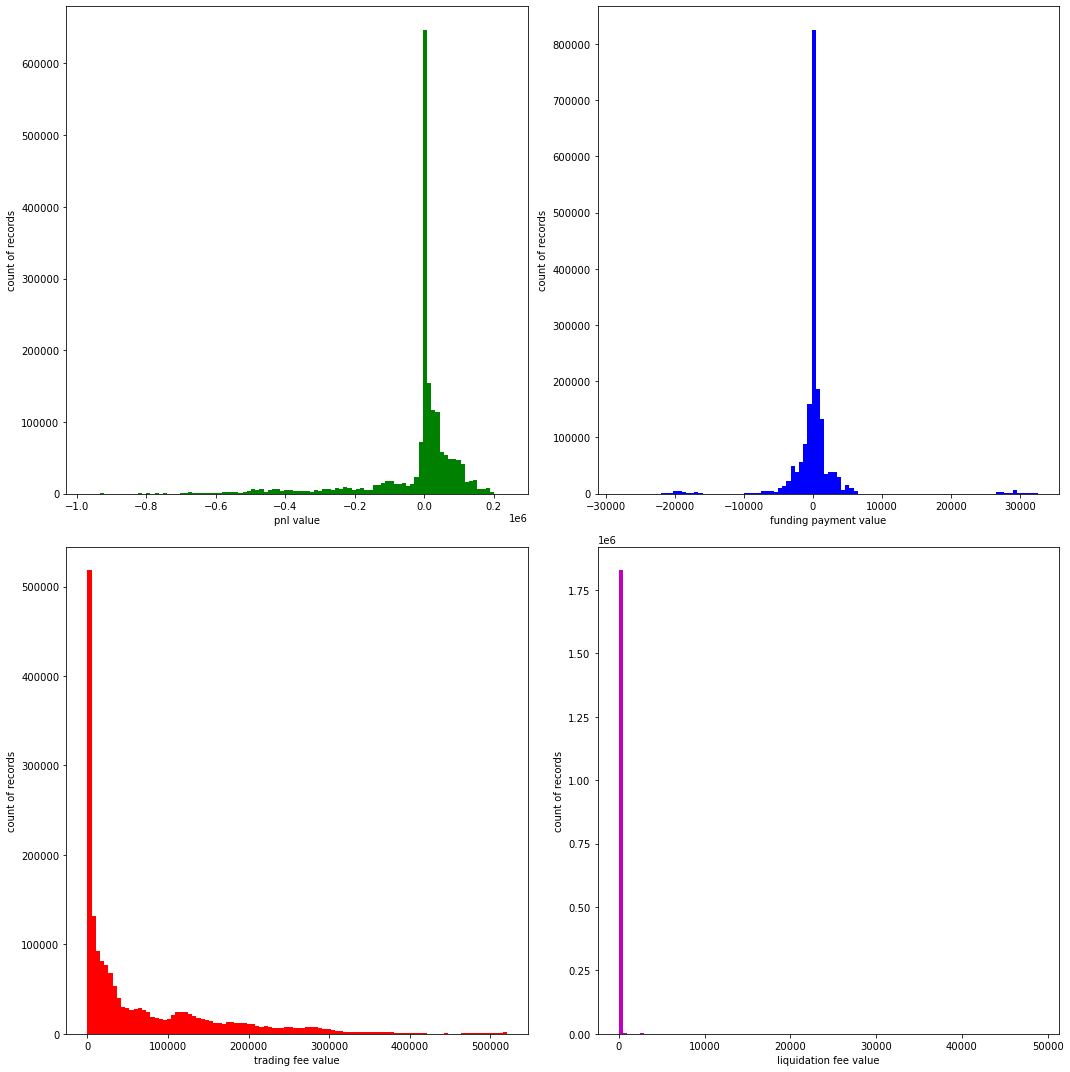

In [27]:
fig = plt.figure(figsize=(15, 15))

ax = fig.add_subplot(2, 2, 1)
ax.hist(position_histories_df["realized_pnl"], color='g', bins=100)
ax.set_xlabel("pnl value")
ax.set_ylabel("count of records")

ax = fig.add_subplot(2, 2, 2)
ax.hist(position_histories_df["funding_payment"], color='b', bins=100)
ax.set_xlabel("funding payment value")
ax.set_ylabel("count of records")

ax = fig.add_subplot(2, 2, 3)
ax.hist(position_histories_df["trading_fee"], color='r', bins=100)
ax.set_xlabel("trading fee value")
ax.set_ylabel("count of records")

ax = fig.add_subplot(2, 2, 4)
ax.hist(position_histories_df["liquidation_fee"], color='m', bins=100)
ax.set_xlabel("liquidation fee value")
ax.set_ylabel("count of records")

fig.tight_layout()
plt.show()

In [28]:
len(position_histories_df[position_histories_df["position_size"] >= 0])

694325

In [29]:
len(position_histories_df[position_histories_df["position_size"] < 0])

1140876

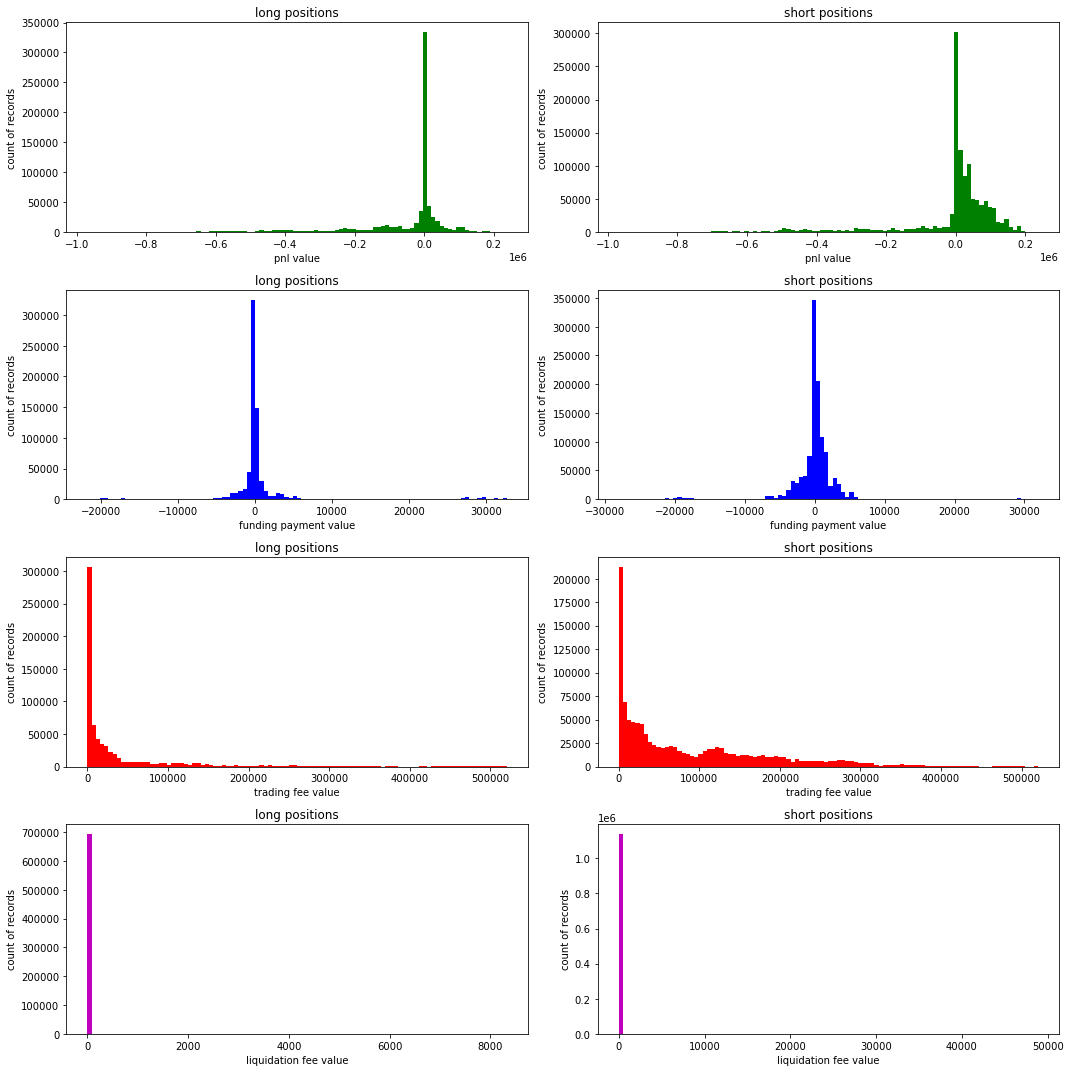

In [30]:
fig = plt.figure(figsize=(15, 15))

ax = fig.add_subplot(4, 2, 1)
ax.hist(position_histories_df[position_histories_df["position_size"] >= 0]["realized_pnl"], color='g', bins=100)
ax.set_xlabel("pnl value")
ax.set_ylabel("count of records")
ax.set_title("long positions")
ax = fig.add_subplot(4, 2, 2)
ax.hist(position_histories_df[position_histories_df["position_size"] < 0]["realized_pnl"], color='g', bins=100)
ax.set_xlabel("pnl value")
ax.set_ylabel("count of records")
ax.set_title("short positions")

ax = fig.add_subplot(4, 2, 3)
ax.hist(position_histories_df[position_histories_df["position_size"] >= 0]["funding_payment"], color='b', bins=100)
ax.set_xlabel("funding payment value")
ax.set_ylabel("count of records")
ax.set_title("long positions")
ax = fig.add_subplot(4, 2, 4)
ax.hist(position_histories_df[position_histories_df["position_size"] < 0]["funding_payment"], color='b', bins=100)
ax.set_xlabel("funding payment value")
ax.set_ylabel("count of records")
ax.set_title("short positions")

ax = fig.add_subplot(4, 2, 5)
ax.hist(position_histories_df[position_histories_df["position_size"] >= 0]["trading_fee"], color='r', bins=100)
ax.set_xlabel("trading fee value")
ax.set_ylabel("count of records")
ax.set_title("long positions")
ax = fig.add_subplot(4, 2, 6)
ax.hist(position_histories_df[position_histories_df["position_size"] < 0]["trading_fee"], color='r', bins=100)
ax.set_xlabel("trading fee value")
ax.set_ylabel("count of records")
ax.set_title("short positions")

ax = fig.add_subplot(4, 2, 7)
ax.hist(position_histories_df[position_histories_df["position_size"] >= 0]["liquidation_fee"], color='m', bins=100)
ax.set_xlabel("liquidation fee value")
ax.set_ylabel("count of records")
ax.set_title("long positions")
ax = fig.add_subplot(4, 2, 8)
ax.hist(position_histories_df[position_histories_df["position_size"] < 0]["liquidation_fee"], color='m', bins=100)
ax.set_xlabel("liquidation fee value")
ax.set_ylabel("count of records")
ax.set_title("short positions")

fig.tight_layout()
plt.show()

# Position liquidations

Fields:

*   ```id``` = transaction hash with appended to the end with transaction log index;
*   ```tx_hash``` = hash code of the transaction;
*   ```trader``` = hash code of the trader;
*   ```base_token``` = hash code of the token, in the pool of which changes are registered;
*   ```liquidator``` = address that closed the position;
*   ```position_notional_abs``` - liquidated position notional abs;
*   ```position_size_abs``` = liquidated position size abs;
*   ```liquidation_fee``` = liquidation penalty;
*   ```block_number_log_index``` = block number * 1000 + tx log index. Used for sorting the transactions in the system;
*   ```block_number``` = number of the block where transaction was executed;
*   ```timestamp``` = time in seconds

In [31]:
position_liquidations_df = pd.read_csv("position_liquidations.csv")
position_liquidations_df.drop(columns=["Unnamed: 0"], inplace=True)
position_liquidations_df

,tx_hash,trader,base_token,liquidator,liquidation_fee,position_size_abs,position_notional_abs,block_number,timestamp,time
0,0xf29899730b11a5753acfd2aa76323a00cc5138bc0432...,0x98029c23e4a554989c280de7fcb1c2ededf2b17f,0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb,0x5b3b3ed2bc7e643f6b558237e7c488e6b32eed80,48.873227,0.453003,1954.929064,571747,1638141748,2021-11-28 23:22:28
1,0x94eec0d2531abdd25a4114cff480dda1d42e1b5624af...,0x499166d1a71fed3b490ddb0591f4ae14c1031993,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,0x4680cca73f815b583a201afef4b70451fb53b7af,138.828968,0.096288,5553.158726,572724,1638144236,2021-11-29 00:03:56
2,0x5dfcb2f5856e4df95701ac6142b20e7e491314119693...,0x35952141922ee99a04e016c967c3f0ad589ea958,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,0x5b3b3ed2bc7e643f6b558237e7c488e6b32eed80,15.017667,0.010330,600.706678,573466,1638145638,2021-11-29 00:27:18
3,0xc8f54890f82e3b91f802c221765b025a8c119c498fbb...,0xd087966b4d2b1841c88b4d62b407d5ef1a465ac3,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,0x5b3b3ed2bc7e643f6b558237e7c488e6b32eed80,121.233376,0.083333,4849.335035,573632,1638145930,2021-11-29 00:32:10
4,0x71bfc81fe97adc1e8d4f783ec56fd9fa6bc1d024602c...,0x35952141922ee99a04e016c967c3f0ad589ea958,0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb,0x5b3b3ed2bc7e643f6b558237e7c488e6b32eed80,66.776190,0.608888,2671.047610,574411,1638147791,2021-11-29 01:03:11
...,...,...,...,...,...,...,...,...,...,...
2540,0x8523d14e61979f8f87b0c3569eaf8aab2ef3d9b01899...,0xfdfb146bff194e53661f18b9a1ffa60da9107d19,0x9482aafdced6b899626f465e1fa0cf1b1418d797,0xdcf93a1eacfe39f04e07c04cf7315412133c6167,0.019161,0.209677,0.766425,6521223,1651005360,2022-04-26 20:36:00
2541,0xed14065a5857d170d00e896bf69a8e13e45a52511599...,0x95f6acd42d85d699d2a8066d0237f13a9e82a29a,0x3fb3282e3ba34a0bff94845f1800eb93cc6850d4,0x40fac6b96c112d1339e4243d856dc31ce2be2034,101.445011,320.067886,4057.800458,6530813,1651015372,2022-04-26 23:22:52
2542,0xd560824df8505cd433c4a5fca89c7297ccf4c209e14c...,0x00ccef1f2c02a986841a6eece88451be8f86958d,0x77d0cc9568605bfff32f918c8ffaa53f72901416,0x2f06b6fbd4ce2139e01a1bee7154b79f898c0dd4,10.841782,4333.852636,433.671287,6532058,1651016226,2022-04-26 23:37:06
2543,0x95e959c4b7a22d5bf3acaa3bb63e6542b7977c760f6c...,0xc0b2b0d1ed3d743f409b65821abfd0d249a46bce,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,0xdcf93a1eacfe39f04e07c04cf7315412133c6167,0.191831,0.000196,7.673236,6579040,1651047633,2022-04-27 08:20:33


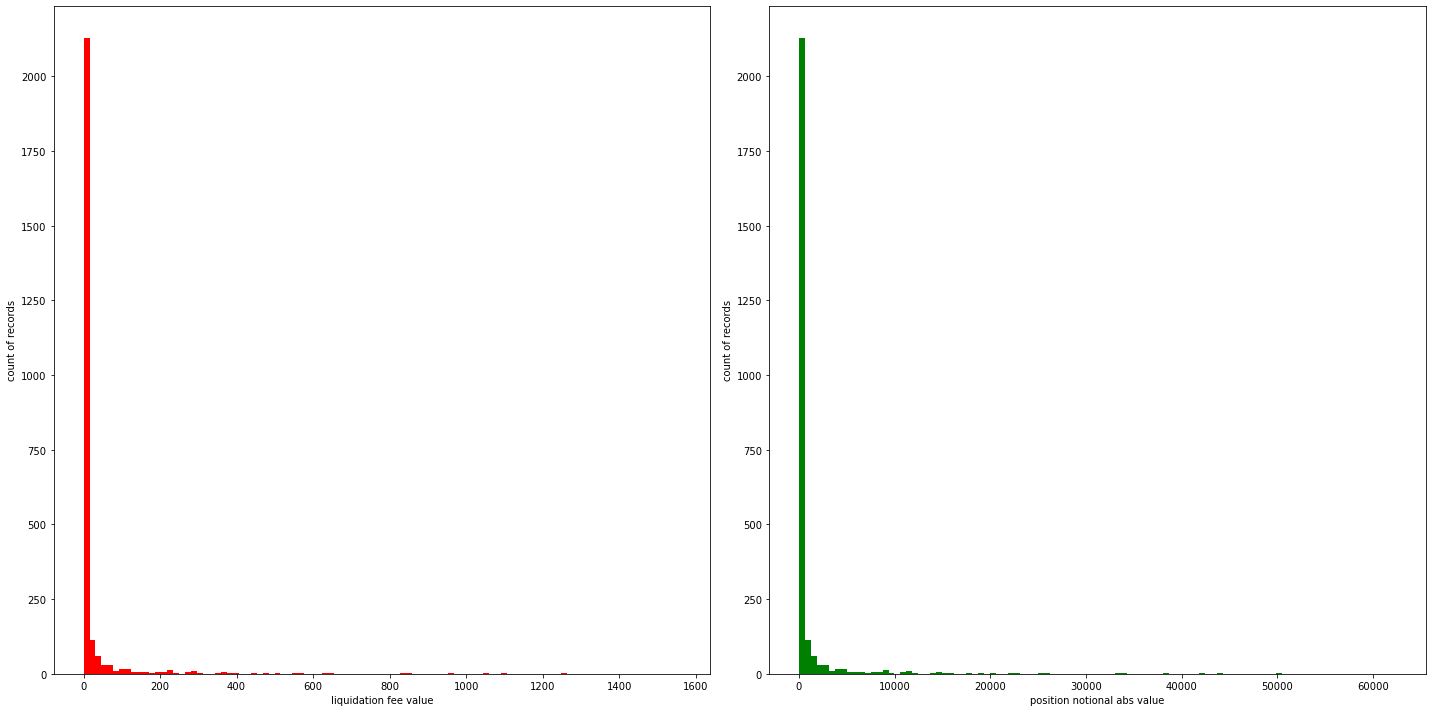

In [32]:
fig = plt.figure(figsize=(20, 10))

ax = fig.add_subplot(1, 2, 1)
ax.hist(position_liquidations_df[position_liquidations_df["liquidation_fee"] < (position_liquidations_df["liquidation_fee"].max() / 
                                                                                10)]["liquidation_fee"], color="r", bins=100)
ax.set_xlabel("liquidation fee value")
ax.set_ylabel("count of records")

ax = fig.add_subplot(1, 2, 2)
ax.hist(position_liquidations_df[position_liquidations_df["position_notional_abs"] < (position_liquidations_df["position_notional_abs"].max() / 
                                                                                      10)]["position_notional_abs"], color="g", bins=100)
ax.set_xlabel("position notional abs value")
ax.set_ylabel("count of records")

fig.tight_layout()
plt.show()

In [33]:
print("there are " + str(len(position_liquidations_df["trader"].unique())) + " unique traders")
print("there are " + str(len(position_liquidations_df["base_token"].unique())) + " unique base tokens")

there are 2288 unique traders
there are 17 unique base tokens


# Positions

Fields (deprecated):

*   ```id``` = transaction hash with appended to the end with transaction log index;
*   ```trader``` = hash code of the trader;
*   ```base_token``` = hash code of the token, in the pool of which changes are registered;
*   ```position_size``` = current position size;
*   ```open_notional``` - average open notional of the current position;
*   ```entry_price``` = average entry price of the current position - abs(open_notional / position_size);
*   ```trading_volume``` = cumulative trading volume;
*   ```realized_pnl``` = cumulative realized pnl;
*   ```funding_payment``` = cumulative funding payment ("-" is received; "+" is sent)
*   ```trading_fee``` = cumulative trading fee
*   ```liquidation_fee``` = cumulative liquidation fee
*   ```block_number``` = number of the block where transaction was executed;
*   ```timestamp``` = time in seconds

In [34]:
positions_df = pd.read_csv("positions.csv")
positions_df.drop(columns=["Unnamed: 0"], inplace=True)
positions_df

,id,trader,base_token,position_size,open_notional,entry_price,trading_volume,realized_pnl,funding_payment,trading_fee,liquidation_fee,block_number,timestamp,time
0,0x643491fa9fff5870553080ae699474e78d6b804a-0x8...,0x643491fa9fff5870553080ae699474e78d6b804a,0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb,0.000000,0.000000,0.000000,8.886920e+03,-47.665924,5.471935,8.891388,0.0,544212,1638075667,2021-11-28 05:01:07
1,0x643491fa9fff5870553080ae699474e78d6b804a-0x8...,0x643491fa9fff5870553080ae699474e78d6b804a,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,0.000000,0.000000,0.000000,6.852486e+03,4.086850,-4.125551,6.855910,0.0,544225,1638075723,2021-11-28 05:02:03
2,0x4ffef86586e730bd8e848708124c105d8f01ba7d-0x8...,0x4ffef86586e730bd8e848708124c105d8f01ba7d,0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb,0.000000,0.000000,0.000000,2.386639e+04,175.487857,-41.063838,23.878231,0.0,547490,1638084425,2021-11-28 07:27:05
3,0x7d53cc81696f852bfb9f56d39ed3787fa66ec9a0-0x8...,0x7d53cc81696f852bfb9f56d39ed3787fa66ec9a0,0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb,0.000000,0.000000,0.000000,8.151917e+03,19.363356,-0.044933,8.155983,0.0,547564,1638084425,2021-11-28 07:27:05
4,0xb3344d84ad8dd6b96301991bf12dc739e226c9cf-0x8...,0xb3344d84ad8dd6b96301991bf12dc739e226c9cf,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,0.000000,0.000000,0.000000,1.099594e+04,-49.990952,-2.376406,11.001465,0.0,552749,1638096042,2021-11-28 10:40:42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14580,0x675e328b73e15cd41acd2828b83b417687c36bba-0x7...,0x675e328b73e15cd41acd2828b83b417687c36bba,0x7161c3416e08abaa5cd38e68d9a28e43a694e037,-19465.826889,48681.807752,2.500886,5.897537e+07,-224552.111522,-2865.119093,33787.902102,0.0,6649756,1651136028,2022-04-28 08:53:48
14581,0x3478d1ba5bc6c0e662dec109c70c0065dad5f5be-0x7...,0x3478d1ba5bc6c0e662dec109c70c0065dad5f5be,0x7eada83e15acd08d22ad85a1dce92e5a257acb92,-52259.271254,274835.819837,5.259083,5.049887e+07,-94044.626301,2135.694687,28922.709910,0.0,6649776,1651136044,2022-04-28 08:54:04
14582,0xe77dd81813bd06d74a30d1b2c07418906456498e-0x2...,0xe77dd81813bd06d74a30d1b2c07418906456498e,0x2f198182ec54469195a4a06262a9431a42462373,1301.418388,-16790.309554,12.901546,5.533817e+07,-153685.943220,-703.504155,25490.849952,0.0,6649774,1651136044,2022-04-28 08:54:04
14583,0xe77dd81813bd06d74a30d1b2c07418906456498e-0x3...,0xe77dd81813bd06d74a30d1b2c07418906456498e,0x333b1ea429a88d0dd48ce7c06c16609cd76f43a8,-41666.454779,105279.796804,2.526728,6.572882e+07,-182808.744051,-593.035906,28924.384674,0.0,6649766,1651136044,2022-04-28 08:54:04


In [35]:
print("there are " + str(len(positions_df["trader"].unique())) + " unique traders")
print("there are " + str(len(positions_df["base_token"].unique())) + " unique base tokens")
print("=========================================================================================")
print("overall trading volume of the system = " + str(positions_df["trading_volume"].sum()) + " USD")
print("overall trading fee of the system = " + str(positions_df["trading_fee"].sum()) + " USD")
print("overall trading realized pnl of the system = " + str(positions_df["realized_pnl"].sum()) + " USD")
print("overall liquidation fee of the system = " + str(positions_df["liquidation_fee"].sum()) + " USD")

there are 11435 unique traders
there are 18 unique base tokens
overall trading volume of the system = 8504670904.227236 USD
overall trading fee of the system = 7873985.689715631 USD
overall trading realized pnl of the system = -6849502.898150745 USD
overall liquidation fee of the system = 187991.27303976202 USD


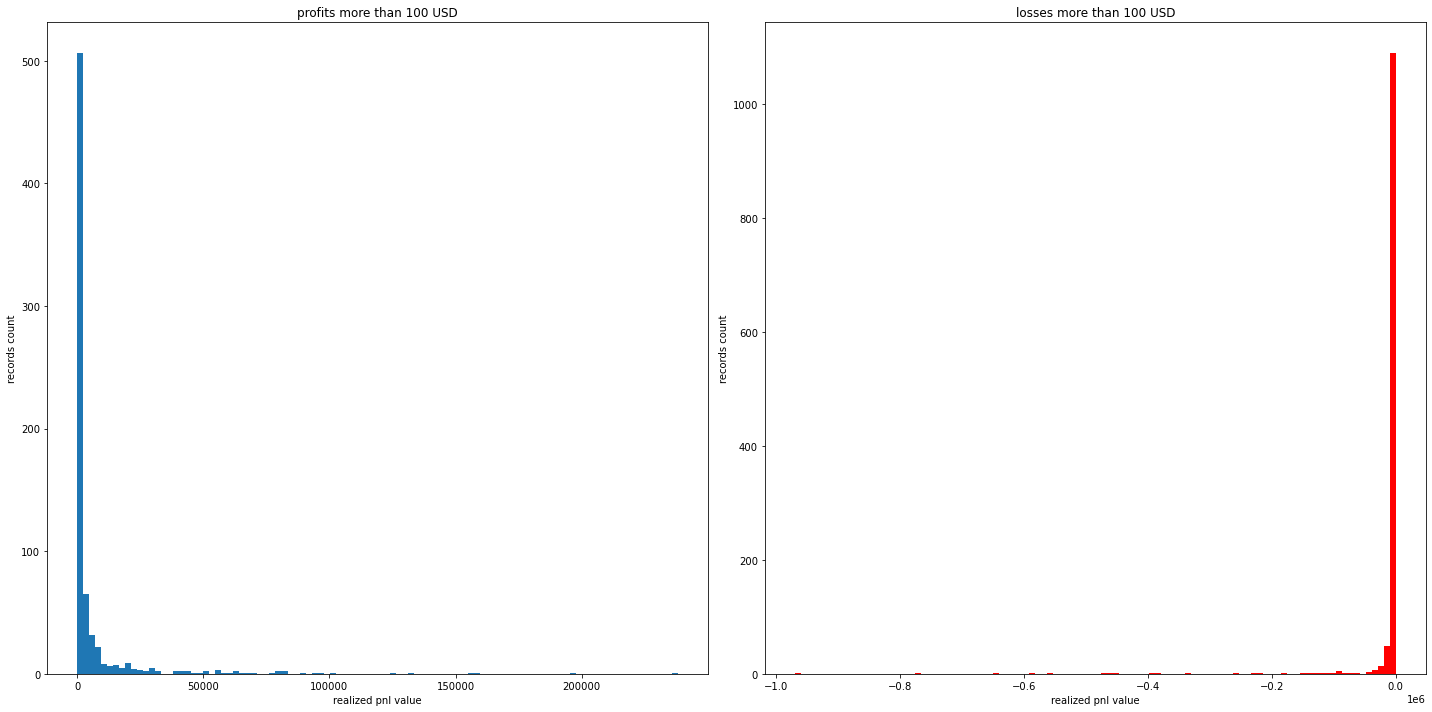

In [36]:
fig = plt.figure(figsize=(20, 10))

ax = fig.add_subplot(1, 2, 1)
ax.hist(positions_df[(positions_df["realized_pnl"] > 100)]["realized_pnl"], bins=100)
ax.set_xlabel("realized pnl value")
ax.set_ylabel("records count")
ax.set_title("profits more than 100 USD")

ax = fig.add_subplot(1, 2, 2)
ax.hist(positions_df[(positions_df["realized_pnl"] < -100)]["realized_pnl"], color="r", bins=100)
ax.set_xlabel("realized pnl value")
ax.set_ylabel("records count")
ax.set_title("losses more than 100 USD")

fig.tight_layout()
plt.show()

# Withdraws

Fields:

*   ```id``` = transaction hash with appended to the end with transaction log index;
*   ```tx_hash``` = hash code of the transaction;
*   ```trader``` = hash code of the trader;
*   ```collateral_token``` = collateral token in which withdraw is performed (in all of the cases there is an USD coin);
*   ```amount``` = how much was withdrawn;
*   ```block_number_log_index``` = block number * 1000 + tx log index. Used for sorting.
*   ```block_number``` = number of the block where transaction was executed;
*   ```timestamp``` = time in seconds

In [37]:
withdraws_df = pd.read_csv("withdraws.csv")
withdraws_df.drop(columns=["Unnamed: 0"], inplace=True)
withdraws_df

,id,tx_hash,trader,collateral_token,amount,block_number_log_index,block_number,timestamp,time
0,0x523a7a44bc2ccee84ae8337949db01ef4b5268f420e0...,0x523a7a44bc2ccee84ae8337949db01ef4b5268f420e0...,0x499166d1a71fed3b490ddb0591f4ae14c1031993,0x7f5c764cbc14f9669b88837ca1490cca17c31607,173.323015,575084001,575084,1638150257,2021-11-29 01:44:17
1,0x29583b942fdaf2f39c3ef38fbc18e6ade9c7edc73715...,0x29583b942fdaf2f39c3ef38fbc18e6ade9c7edc73715...,0x4ffef86586e730bd8e848708124c105d8f01ba7d,0x7f5c764cbc14f9669b88837ca1490cca17c31607,1418.636005,578836001,578836,1638166466,2021-11-29 06:14:26
2,0x6b7a65b92feaaa0e61acda8d53ff7bffd97c5353a796...,0x6b7a65b92feaaa0e61acda8d53ff7bffd97c5353a796...,0x2441434f47e511a13714d8f7ae60dd923b1cfadd,0x7f5c764cbc14f9669b88837ca1490cca17c31607,681.426360,578875001,578875,1638166558,2021-11-29 06:15:58
3,0x7f694a7478ca8f244e9764c3561de318bb48d9c9edb4...,0x7f694a7478ca8f244e9764c3561de318bb48d9c9edb4...,0x27fee0c6356c2f27e646d73f2256d30331c6a001,0x7f5c764cbc14f9669b88837ca1490cca17c31607,499.951236,578895001,578895,1638166558,2021-11-29 06:15:58
4,0x85b233912d3f34b064fb1b0396878787f1f9ae6c33f6...,0x85b233912d3f34b064fb1b0396878787f1f9ae6c33f6...,0xf2cd72adf27aea9808152a93dab9092e89163fb5,0x7f5c764cbc14f9669b88837ca1490cca17c31607,688.383929,579467001,579467,1638168684,2021-11-29 06:51:24
...,...,...,...,...,...,...,...,...,...
11092,0x68d5bc9de659586a53f187d785fed4c2d8f2e19f0c52...,0x68d5bc9de659586a53f187d785fed4c2d8f2e19f0c52...,0xe7a4e7a1416ba6cc84cb5a3afd1daa0c7ef1bf29,0x7f5c764cbc14f9669b88837ca1490cca17c31607,1.000000,6644267007,6644267,1651129811,2022-04-28 07:10:11
11093,0xb33558190b5397402bcdf1435e0d14302727b62debb7...,0xb33558190b5397402bcdf1435e0d14302727b62debb7...,0xb92506efc3b9e33a3e4f313a79436e9883f92b18,0x7f5c764cbc14f9669b88837ca1490cca17c31607,1.993989,6644460001,6644460,1651129989,2022-04-28 07:13:09
11094,0xae48a71e7e35542803006935abc05b3de2035380721a...,0xae48a71e7e35542803006935abc05b3de2035380721a...,0x0df2a3b9e5b8ac060b73654c0b7d77ad7dae572f,0x7f5c764cbc14f9669b88837ca1490cca17c31607,1.994002,6647256001,6647256,1651133305,2022-04-28 08:08:25
11095,0x87441dc4308daf37ba3dcad33c595a6e554d6fed7043...,0x87441dc4308daf37ba3dcad33c595a6e554d6fed7043...,0xfdf3b3b1cfe5f4967daba1719693d589ba790c1c,0x7f5c764cbc14f9669b88837ca1490cca17c31607,1369.706620,6650269001,6650269,1651136454,2022-04-28 09:00:54


In [38]:
print("there are " + str(len(withdraws_df["trader"].unique())) + " unique traders")
print("there are " + str(len(withdraws_df["collateral_token"].unique())) + " unique base tokens")
print("sum of the withdrawn funds = " + str(withdraws_df["amount"].sum()) + " USD")

there are 7358 unique traders
there are 1 unique base tokens
sum of the withdrawn funds = 42670682.063575 USD


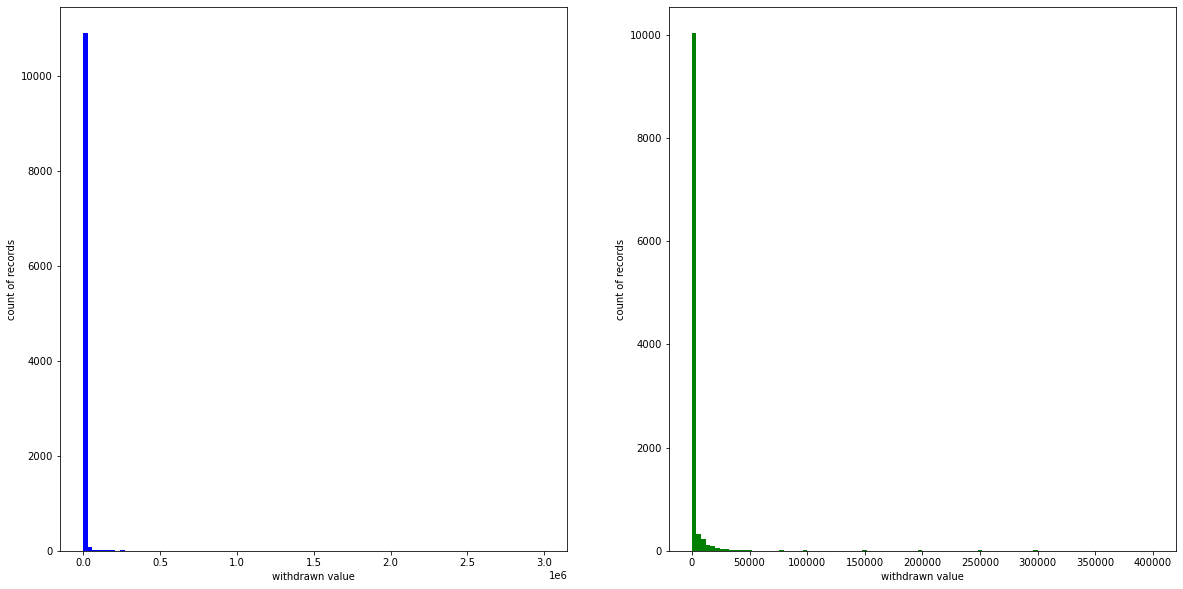

In [41]:
fig = plt.figure(figsize=(20, 10))

ax = fig.add_subplot(1, 2, 1)
ax.hist(withdraws_df["amount"], color="b", bins=100)
ax.set_xlabel("withdrawn value")
ax.set_ylabel("count of records")

ax = fig.add_subplot(1, 2, 2)
ax.hist(withdraws_df[withdraws_df["amount"] < 500000]["amount"], color="g", bins=100)
ax.set_xlabel("withdrawn value")
ax.set_ylabel("count of records")

plt.show()